<a href="https://colab.research.google.com/github/coderzaman/Data-Analysis-Notebooks/blob/main/California_Housing_Prices_Dataset_Using_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Package Install and Import Libraries**

**Import Libraries**

In [ ]:
# --- Core Libraries for Data Manipulation ---
import pandas as pd
import numpy as np
import tensorflow as tf

# --- Libraries for Data Visualization ---
import seaborn as sns
import matplotlib.pyplot as plt

# --- Libraries for Data Preprocessing & Feature Analysis ---
from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Note: OneHotEncoder is often better than LabelEncoder for nominal data.
# We used pd.get_dummies in the notebook which is a convenient way to do one-hot encoding.
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Corrected import
from sklearn.preprocessing import LabelEncoder
# --- Machine Learning Models ---
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Added for better performance

# --- Metrics for Model Evaluation ---
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score

# --- Other Utilities ---
import warnings
warnings.filterwarnings("ignore")

# --- Notebook Specific Settings ---
# %matplotlib inline # Ensures plots are displayed in the notebook
sns.set_theme(style='whitegrid') # Sets a nice default style for plots

print("Essential libraries imported successfully.")

Essential libraries imported successfully.


# **Import Drive and Read Dataset**

**Import Drive**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


**Read Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


# **Data Preprocessing**

**Data Cleaning (Remove Null Values)**

In [ ]:
# Check for any missing values
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# Drop Null Values
df.dropna(inplace=True)

In [ ]:
# Check for any missing values after Cleaning
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# Checking for missing data
missing_data = df.isnull()

print("Missing data by column:")
missing_data

Missing data by column:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Print the total number of missing values in the entire DataFrame.
total_missing = df.isnull().sum()
print(f"Total data missing in DataFrame:\n{total_missing}",)

Total data missing in DataFrame:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
df.shape

(20433, 10)

**Label Encocding**

In [ ]:


# Initialize the encoder
le = LabelEncoder()

# Apply label encoding on the 'ocean_proximity' column
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

# Check the result
print(df[['ocean_proximity']].head())

# If you want to see what labels were assigned
print("Encoding classes:", le.classes_)
print("Encoded values:", le.transform(le.classes_))

   ocean_proximity
0                3
1                3
2                3
3                3
4                3
Encoding classes: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Encoded values: [0 1 2 3 4]


**Feature scaling (StandardScaler)**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Suppose df is your DataFrame and 'median_house_value' is the target (output)
X = df.drop('median_house_value', axis=1)  # features
y = df['median_house_value']               # target

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional, just to keep feature names)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check scaled data
print(X_scaled.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327314  1.051717            0.982163    -0.803813       -0.970325   
1  -1.322323  1.042355           -0.606210     2.042130        1.348276   
2  -1.332305  1.037674            1.855769    -0.535189       -0.825561   
3  -1.337296  1.037674            1.855769    -0.623510       -0.718768   
4  -1.337296  1.037674            1.855769    -0.461970       -0.611974   

   population  households  median_income  ocean_proximity  
0   -0.973320   -0.976833       2.345163         1.291351  
1    0.861339    1.670373       2.332632         1.291351  
2   -0.819769   -0.843427       1.782939         1.291351  
3   -0.765056   -0.733562       0.932970         1.291351  
4   -0.758879   -0.628930      -0.013143         1.291351  


In [ ]:
# Combine features + target into one DataFrame
df_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Check the result
print(df_scaled.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327314  1.051717            0.982163    -0.803813       -0.970325   
1  -1.322323  1.042355           -0.606210     2.042130        1.348276   
2  -1.332305  1.037674            1.855769    -0.535189       -0.825561   
3  -1.337296  1.037674            1.855769    -0.623510       -0.718768   
4  -1.337296  1.037674            1.855769    -0.461970       -0.611974   

   population  households  median_income  ocean_proximity  median_house_value  
0   -0.973320   -0.976833       2.345163         1.291351            452600.0  
1    0.861339    1.670373       2.332632         1.291351            358500.0  
2   -0.819769   -0.843427       1.782939         1.291351            352100.0  
3   -0.765056   -0.733562       0.932970         1.291351            341300.0  
4   -0.758879   -0.628930      -0.013143         1.291351            342200.0  


# Data Visualization

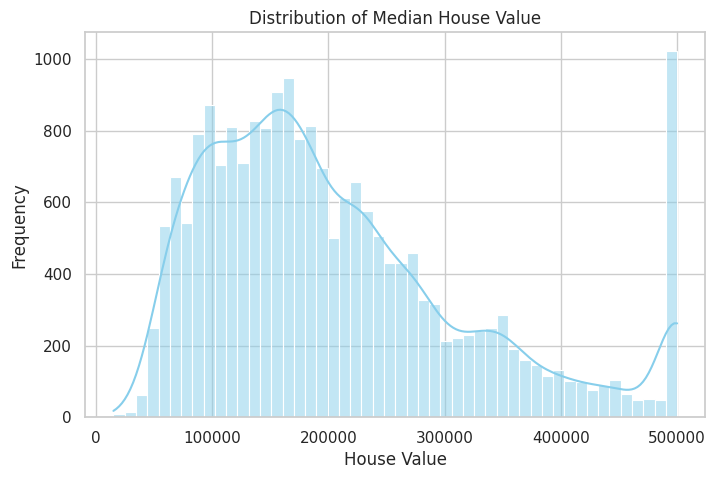

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Target Variable
plt.figure(figsize=(8,5))
sns.histplot(y, bins=50, kde=True, color="skyblue")
plt.title("Distribution of Median House Value")
plt.xlabel("House Value")
plt.ylabel("Frequency")
plt.show()

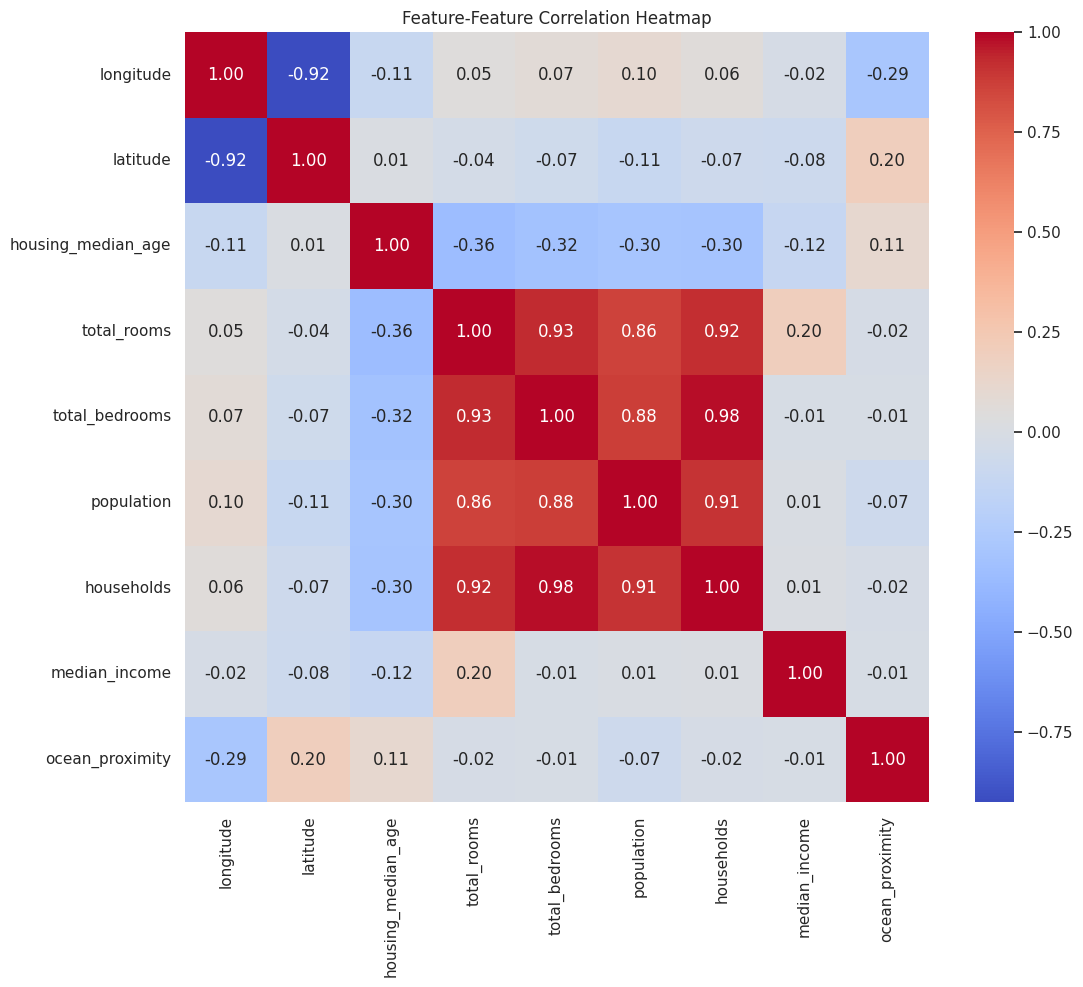

In [ ]:
# -------------------------------------------------------------------
# --- 1. Feature-Feature Correlation Analysis ---
# -------------------------------------------------------------------
# Calculate the correlation matrix for the scaled features
feature_corr_matrix = X_scaled.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(feature_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature-Feature Correlation Heatmap")
plt.show()

--- 2. Feature-Target Correlation (Predictive Power Check) ---
Correlation of each feature with 'median_house_value':
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
ocean_proximity       0.080488
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64




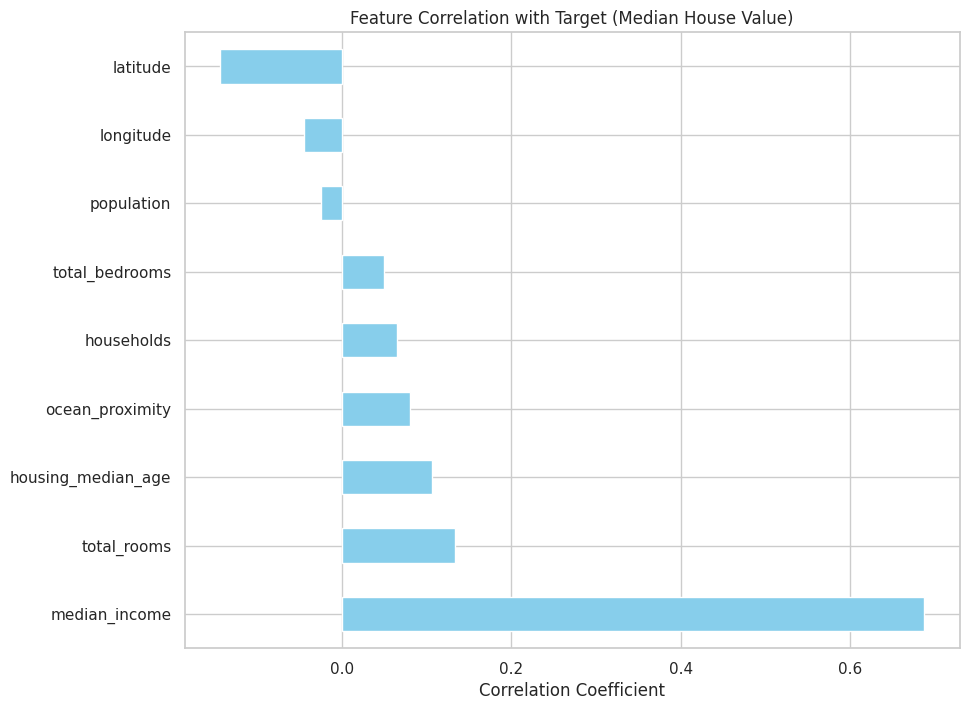

In [ ]:
# -------------------------------------------------------------------
# --- 2. Feature-Target Correlation Analysis ---
# -------------------------------------------------------------------
print("--- 2. Feature-Target Correlation (Predictive Power Check) ---")
# To calculate the correlation with the target, we need to combine them temporarily
# We must use .reset_index(drop=True) to ensure the indices align correctly
temp_df = pd.concat([X_scaled.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

# Calculate the full correlation matrix
full_corr_matrix = temp_df.corr()

# Extract the correlation of each feature with the target variable and sort it
feature_target_corr = full_corr_matrix['median_house_value'].sort_values(ascending=False)

# Display the sorted correlations (excluding the target's correlation with itself)
print("Correlation of each feature with 'median_house_value':")
print(feature_target_corr.drop('median_house_value'))
print("\n")

# Visualize the Feature-Target correlation
plt.figure(figsize=(10, 8))
feature_target_corr.drop('median_house_value').plot(kind='barh', color='skyblue')
plt.title('Feature Correlation with Target (Median House Value)')
plt.xlabel('Correlation Coefficient')
plt.show()


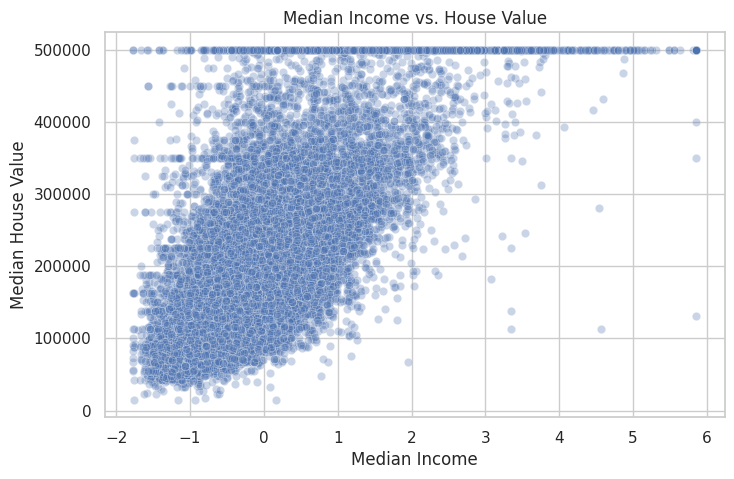

In [ ]:
# 3. Scatter Plot (example: income vs house value)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_scaled['median_income'], y=df_scaled['median_house_value'], alpha=0.3)
plt.title("Median Income vs. House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

# **Feature Engineering**

### PCA Scenario: Handling Highly Correlated Features

**1. The Problem: Multicollinearity**

Our initial correlation analysis revealed strong multicollinearity (high correlation between features) in two distinct groups:
* **Size/Density Features:** `total_rooms`, `total_bedrooms`, `population`, `households`
* **Location Features:** `longitude`, `latitude`

Keeping these redundant features can make our model unstable and less reliable.

**2. The Solution: Why We Use PCA**

We have two main options to solve this:
* **Option A: Discard Features:** This is a simple approach, but it leads to information loss. If we keep `total_rooms` and discard the other three size-related features, we lose the unique information contained in them.
* **Option B: Use PCA:** This is a more advanced and robust approach. PCA combines the highly correlated features into a smaller set of new, uncorrelated features called **principal components**. This method reduces redundancy while preserving most of the original information.

For this assignment, we will use **PCA** because it is a more effective method that avoids information loss and demonstrates a key dimensionality reduction technique. The following code will implement PCA on these two groups to create a final, optimized feature set for modeling.

In [ ]:
# 1. Isolate the feature groups
size_features = ['total_rooms', 'total_bedrooms', 'population', 'households']
location_features = ['longitude', 'latitude']
other_features = X_scaled.drop(columns=size_features + location_features)

X_size = X_scaled[size_features]
X_location = X_scaled[location_features]


print("--- Applying PCA to reduce multicollinearity ---")

# 2. Apply PCA to the size/density features
# We'll reduce the 4 features to 1 principal component.
pca_size = PCA(n_components=1)
X_pca_size = pca_size.fit_transform(X_size)
X_pca_size_df = pd.DataFrame(X_pca_size, columns=['PCA_size_density'])
print(f"Explained variance by PCA_size_density: {pca_size.explained_variance_ratio_[0]:.2%}")


# 3. Apply PCA to the location features
# We'll reduce the 2 location features to 1 principal component.
pca_location = PCA(n_components=1)
X_pca_location = pca_location.fit_transform(X_location)
X_pca_location_df = pd.DataFrame(X_pca_location, columns=['PCA_location'])
print(f"Explained variance by PCA_location: {pca_location.explained_variance_ratio_[0]:.2%}")


# 4. Create the final dataset for model training
# We combine the new PCA components with the other uncorrelated features.
X_final = pd.concat([other_features.reset_index(drop=True),
                     X_pca_size_df.reset_index(drop=True),
                     X_pca_location_df.reset_index(drop=True)], axis=1)


print("\n--- Final Dataset for Modeling ---")
print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Number of features after applying PCA to correlated groups: {X_final.shape[1]}")
print("\nFirst 5 rows of the new, optimized feature set:")
print(X_final.head())

--- Applying PCA to reduce multicollinearity ---
Explained variance by PCA_size_density: 93.42%
Explained variance by PCA_location: 96.23%

--- Final Dataset for Modeling ---
Original number of features: 9
Number of features after applying PCA to correlated groups: 5

First 5 rows of the new, optimized feature set:
   housing_median_age  median_income  ocean_proximity  PCA_size_density  \
0            0.982163       2.345163         1.291351         -1.862510   
1           -0.606210       2.332632         1.291351          2.967293   
2            1.855769       1.782939         1.291351         -1.513100   
3            1.855769       0.932970         1.291351         -1.420126   
4            1.855769      -0.013143         1.291351         -1.229512   

   PCA_location  
0     -1.682229  
1     -1.672080  
2     -1.675828  
3     -1.679358  
4     -1.679358  


In [ ]:
X_final

,housing_median_age,median_income,ocean_proximity,PCA_size_density,PCA_location
0,0.982163,2.345163,1.291351,-1.862510,-1.682229
1,-0.606210,2.332632,1.291351,2.967293,-1.672080
2,1.855769,1.782939,1.291351,-1.513100,-1.675828
3,1.855769,0.932970,1.291351,-1.420126,-1.679358
4,1.855769,-0.013143,1.291351,-1.229512,-1.679358
...,...,...,...,...,...
20428,-0.288535,-1.216727,-0.117001,-0.892797,-1.809483
20429,-0.844466,-0.692044,-0.117001,-1.880157,-1.855144
20430,-0.923885,-1.143171,-0.117001,-0.418600,-1.838814
20431,-0.844466,-1.055136,-0.117001,-0.825770,-1.874107


**After PCA Feature-Feature Correlation Analysis**

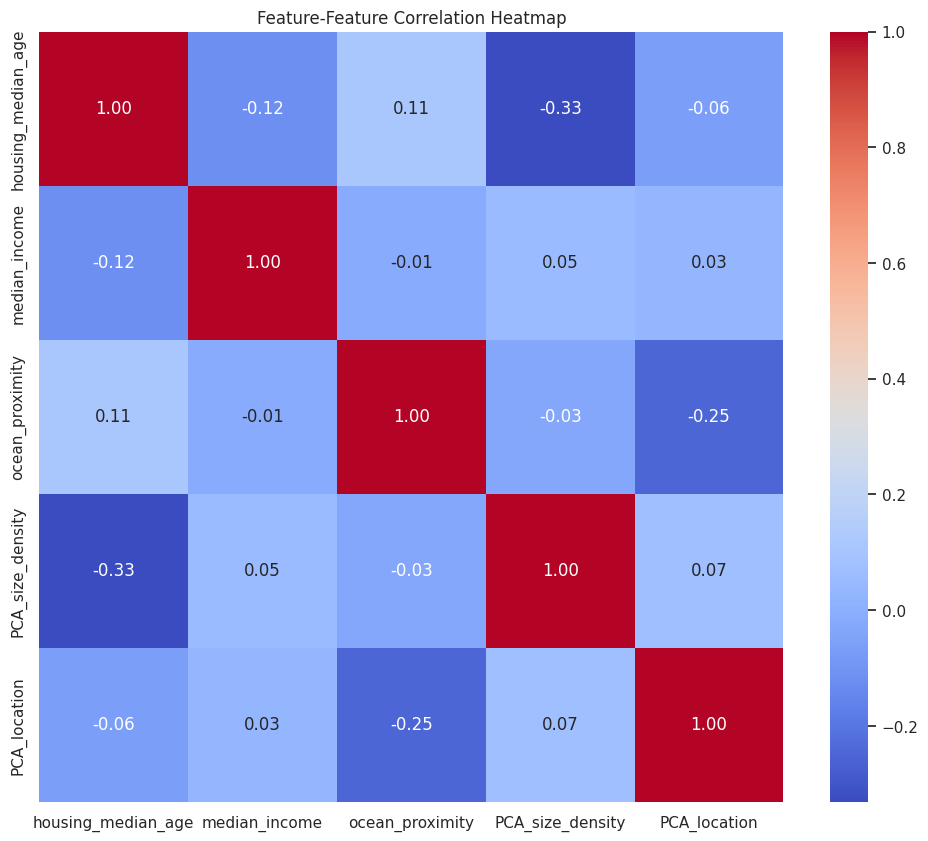

In [ ]:
# Calculate the correlation matrix for the scaled features
feature_corr_matrix = X_final.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(feature_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature-Feature Correlation Heatmap")
plt.show()

**Final Feature-Target Correlation Analysis**

--- Final Feature Correlation with Target ---
Correlation of each final feature with 'median_house_value':
median_income         0.688355
housing_median_age    0.106432
ocean_proximity       0.080488
PCA_size_density      0.057971
PCA_location          0.050582
Name: median_house_value, dtype: float64




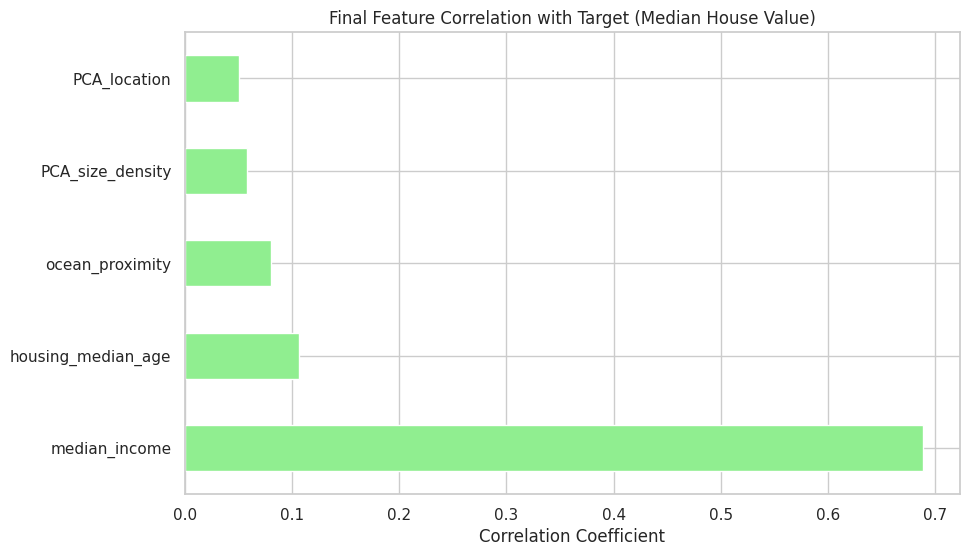

In [ ]:
print("--- Final Feature Correlation with Target ---")

# Combine the final features with the target variable to calculate correlation
final_df_corr = pd.concat([X_final.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

# Calculate the correlation matrix
final_corr_matrix = final_df_corr.corr()

# Extract the correlation of each feature with the target and sort it
final_feature_target_corr = final_corr_matrix['median_house_value'].sort_values(ascending=False)

# Display the sorted correlations
print("Correlation of each final feature with 'median_house_value':")
print(final_feature_target_corr.drop('median_house_value'))
print("\n")

# Visualize the Feature-Target correlation
plt.figure(figsize=(10, 6))
final_feature_target_corr.drop('median_house_value').plot(kind='barh', color='lightgreen')
plt.title('Final Feature Correlation with Target (Median House Value)')
plt.xlabel('Correlation Coefficient')
plt.show()


### Note: Skipping LDA and Chi-Square Test for the Regression Dataset

For this part of the assignment, we are working with a **regression** dataset where the goal is to predict a continuous value (`charges`). Based on the requirements of the following two methods, they are not applicable to this type of problem and will be used later on our classification dataset.

1.  **Linear Discriminant Analysis (LDA):**
    * **What it does:** LDA is a supervised dimensionality reduction technique that finds a new feature space that maximizes the separation between different **classes**.
    * **Why we skip it:** Since our regression problem has a continuous target variable and no distinct classes to separate, LDA cannot be applied. We will use LDA for our classification task with the Titanic dataset, where we have clear classes like "Survived" and "Died".

2.  **Chi-Square Test:**
    * **What it does:** The Chi-Square test is a statistical method used to check for a significant relationship between two **categorical variables**.
    * **Why we skip it:** Because our target variable (`charges`) is continuous, the Chi-Square test cannot be used to evaluate its relationship with our categorical features. We will use this test on the Titanic dataset to check for associations between categorical features (e.g., `Sex`, `Embarked`) and the categorical target (`Survived`).

# **Model Training and Evaluation**

**Train and Test Splitting**

In [ ]:
print("--- Splitting Data into Training and Testing Sets ---")
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

--- Splitting Data into Training and Testing Sets ---
Training set shape: (16346, 5)
Testing set shape: (4087, 5)


**Linear Regression**

--- Training Linear Regression Model ---
Linear Regression model trained successfully.


--- Evaluating Linear Regression Model ---
Mean Squared Error (MSE): 6463337097.56
R-Squared (R²): 0.5274
An R² score of 0.5274 means that our model can explain 52.74% of the variance in the house prices.


--- Visualizing Predictions vs. Actual Values ---


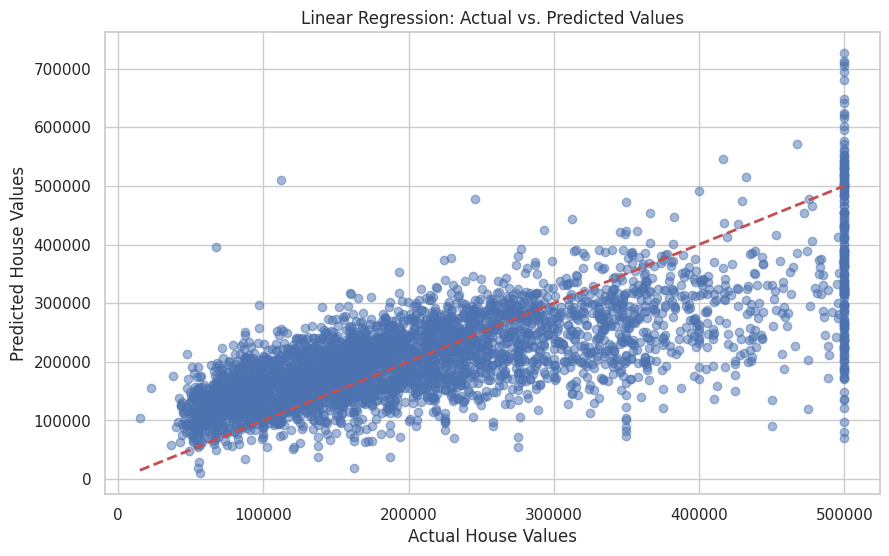

In [ ]:
# -------------------------------------------------------------------
# --- 1. Linear Regression ---
# -------------------------------------------------------------------
print("--- Training Linear Regression Model ---")

# Initialize the model
lin_reg = LinearRegression()

# Train the model on the training data
lin_reg.fit(X_train, y_train)
print("Linear Regression model trained successfully.")
print("\n" + "="*50 + "\n")


# --- Model Evaluation ---
print("--- Evaluating Linear Regression Model ---")

# Make predictions on the test set
y_pred_lin = lin_reg.predict(X_test)

# Calculate performance metrics
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Mean Squared Error (MSE): {mse_lin:.2f}")
print(f"R-Squared (R²): {r2_lin:.4f}")
print(f"An R² score of {r2_lin:.4f} means that our model can explain {r2_lin:.2%} of the variance in the house prices.")
print("\n" + "="*50 + "\n")


# --- Visualizing the Results ---
print("--- Visualizing Predictions vs. Actual Values ---")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.grid(True)
plt.show()

**Note on Linear Regression Performance**

After training and evaluating our initial Linear Regression model, we can conclude that it provides a moderate but not a strong fit for this dataset.

R-Squared (R²) Score: The resulting R² score of 0.5274 indicates that our model can only explain about 52.7% of the variance in the house prices. While this is significantly better than random guessing, it also means that a large portion of the price variation is not being captured by the model.

Visual Inspection: The "Actual vs. Predicted Values" scatter plot confirms this. Although the predictions generally follow the correct trend (the red dashed line), the data points are widely spread out around this line, indicating a high level of error in many of the individual predictions.

**Conclusion:** A simple linear model is not sufficient to capture the complex, non-linear relationships present in this housing data. To improve our predictive accuracy, we will now explore more advanced, **non-linear models such as K-Nearest Neighbors, SVM, and Decision Trees.**

--- Performing Hyperparameter Tuning ---
Tuning KNN...
Best KNN parameters found: {'n_neighbors': 20}

Tuning SVR...
Best SVR parameters found: {'C': 1000, 'gamma': 'scale'}

Tuning Decision Tree...
Best Decision Tree parameters found: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 40}

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
--- Final Model Performance Comparison ---
                            MSE        R2
Decision Tree      3.912727e+09  0.713881
Deep Learning      4.088075e+09  0.701059
KNN                4.620834e+09  0.662101
SVR                5.979827e+09  0.562724
Linear Regression  6.463337e+09  0.527367


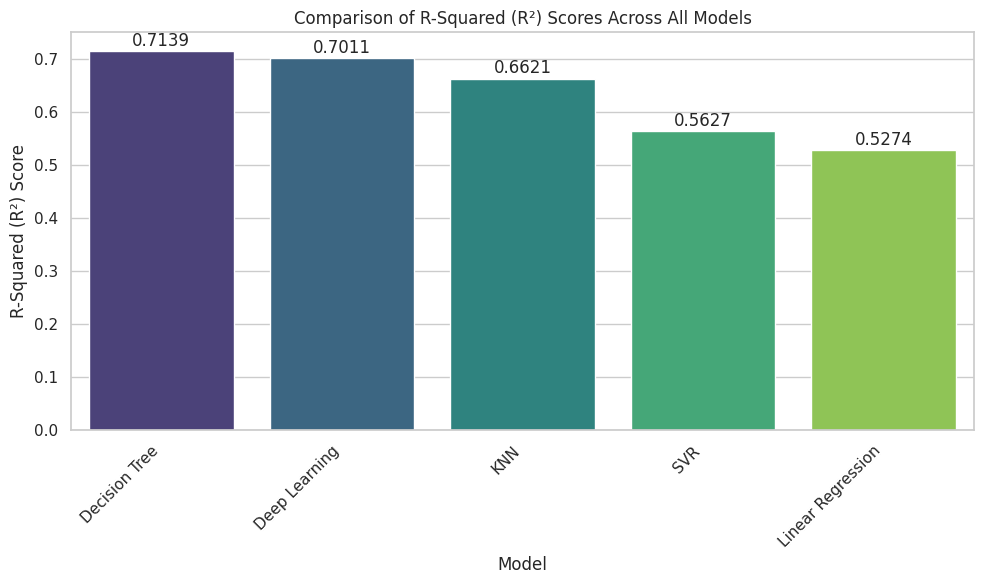

In [ ]:
# -------------------------------------------------------------------
# --- Section: Model Training & Comparison ---
# -------------------------------------------------------------------

# Dictionary to store the final, tuned model results
results = {}

# --- 1. Linear Regression (Baseline Model) ---
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lin),
    'R2': r2_score(y_test, y_pred_lin)
}


# -------------------------------------------------------------------
# --- Section: Hyperparameter Tuning for Advanced Models ---
# -------------------------------------------------------------------
print("--- Performing Hyperparameter Tuning ---")

# --- 2. K-Nearest Neighbors (KNN) Regressor ---
print("Tuning KNN...")
param_grid_knn = {'n_neighbors': [5, 10, 15, 20, 25]}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, refit=True, verbose=0, cv=5)
grid_knn.fit(X_train, y_train)
y_pred_knn_tuned = grid_knn.predict(X_test)
results['KNN'] = {
    'MSE': mean_squared_error(y_test, y_pred_knn_tuned),
    'R2': r2_score(y_test, y_pred_knn_tuned)
}
print(f"Best KNN parameters found: {grid_knn.best_params_}\n")


# --- 3. Support Vector Machine (SVR) ---
print("Tuning SVR...")
param_grid_svr = {'C': [10, 100, 1000], 'gamma': ['scale', 'auto']}
grid_svr = GridSearchCV(SVR(kernel='rbf'), param_grid_svr, refit=True, verbose=0, cv=3)
grid_svr.fit(X_train, y_train)
y_pred_svr_tuned = grid_svr.predict(X_test)
results['SVR'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr_tuned),
    'R2': r2_score(y_test, y_pred_svr_tuned)
}
print(f"Best SVR parameters found: {grid_svr.best_params_}\n")


# --- 4. Decision Tree Regressor ---
print("Tuning Decision Tree...")
param_grid_tree = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [10, 20, 40],
    'min_samples_leaf': [5, 10, 20]
}
grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, refit=True, verbose=0, cv=5)
grid_tree.fit(X_train, y_train)
y_pred_tree_tuned = grid_tree.predict(X_test)
results['Decision Tree'] = {
    'MSE': mean_squared_error(y_test, y_pred_tree_tuned),
    'R2': r2_score(y_test, y_pred_tree_tuned)
}
print(f"Best Decision Tree parameters found: {grid_tree.best_params_}\n")


# --- 5. Deep Learning Model (Neural Network) ---
# Define a deeper model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# --- MODIFIED SECTION: Train for a fixed number of epochs ---
# We will train for exactly 100 epochs to check its performance at this specific point.
history = model.fit(X_train, y_train,
                    epochs=1000,
                    batch_size=32,
                    verbose=0,
                    validation_split=0.2) # We can still monitor validation loss
# --- End of modification ---

# Evaluate the model
y_pred_dl = model.predict(X_test).flatten()
results['Deep Learning'] = {
    'MSE': mean_squared_error(y_test, y_pred_dl),
    'R2': r2_score(y_test, y_pred_dl)
}


# -------------------------------------------------------------------
# --- Final Result Analysis ---
# -------------------------------------------------------------------
print("="*50)
print("--- Final Model Performance Comparison ---")
print("="*50)

# Convert results dictionary to a DataFrame for nice printing
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
print(results_df)


# --- Visualizing the Comparison ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R2'], palette='viridis')
plt.title('Comparison of R-Squared (R²) Scores Across All Models')
plt.xlabel('Model')
plt.ylabel('R-Squared (R²) Score')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(results_df['R2']):
    plt.text(index, value + 0.01, f"{value:.4f}", ha='center')
plt.tight_layout()

# Save the plot to a file
plt.savefig('model_comparison_chart.png', dpi=300, bbox_inches='tight')

plt.show()

**For Download Pdf**

In [ ]:
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc -y
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Assignement-1(Regression _base_ Datasets).ipynb'
from google.colab import files
files.download('/content/drive/MyDrive/Colab Notebooks/Assignement-1(Regression _base_ Datasets).pdf')

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 http://security.ubuntu.com/ubuntu jammy-security InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>